In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Feature scaling
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [9]:
#KNN
knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
print(f'Best choice of k: {np.argmax(knn_scores)+1}')


k = 8
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f'Accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

Best choice of k: 1
Accuracy: 0.8536585365853658


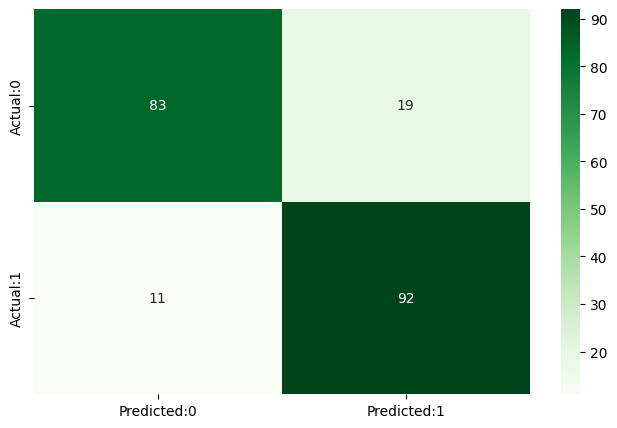

In [10]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [12]:
# SVM

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_scores_c = []
    for ch in range(1,11):
        if kernels[i]=='poly':
            svc_scores_poly=[]
            for d in range(3, 10):
                svc_classifier = SVC(kernel = kernels[i], C=ch, degree=d)
                svc_classifier.fit(X_train, y_train)
                svc_scores_poly.append(svc_classifier.score(X_test, y_test))
            print(f'Best polynomial score: {np.argmax(svc_scores_poly)+3}')
            svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])

        else:
             svc_classifier = SVC(kernel = kernels[i], C=ch)
             svc_classifier.fit(X_train, y_train)
             svc_scores_c.append(svc_classifier.score(X_test, y_test))
    print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c)+1}')
    svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels [np.argmax(svc_scores)]}')


svc_classifier = SVC(kernel = 'rbf', C = 1 )
svc_classifier.fit(X_train, y_train)
print(svc_classifier.score(X_test, y_test))

Best choice of c for linear: 1
Best polynomial score: 3
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 7
Best polynomial score: 3
Best polynomial score: 7
Best polynomial score: 3
Best polynomial score: 3
Best choice of c for poly: 10
Best choice of c for rbf: 7
Best choice of c for sigmoid: 1
Best choice of k: rbf
0.8878048780487805


In [13]:
#decission Tree

dt_scores = []
cr_scores = []
for cr in ['gini', 'entropy']:
    for i in range(1, len (X.columns) + 1):
        dt_classifier = DecisionTreeClassifier (criterion=cr, max_features = i, random_state = 42)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test, y_test))
    print(f'Best max_features for {cr}: {np.argmax(dt_scores)+1}')
    cr_scores.append(dt_scores [np.argmax(dt_scores)])
print(f'Best criterion: {"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max_features for gini: 2
Best max_features for entropy: 2
Best criterion: gini


In [14]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_features = 14, random_state = 42)
dt_classifier.fit(X_train, y_train)
print(dt_classifier.score(X_test, y_test))

0.9853658536585366


In [15]:
# Random Forest

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9853658536585366


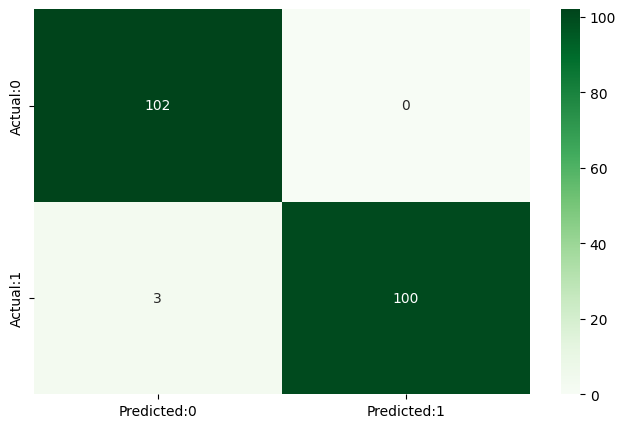

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [18]:
# Logistics Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is ',accuracy_score(y_test, y_pred))

Accuracy of the model is  0.7951219512195122


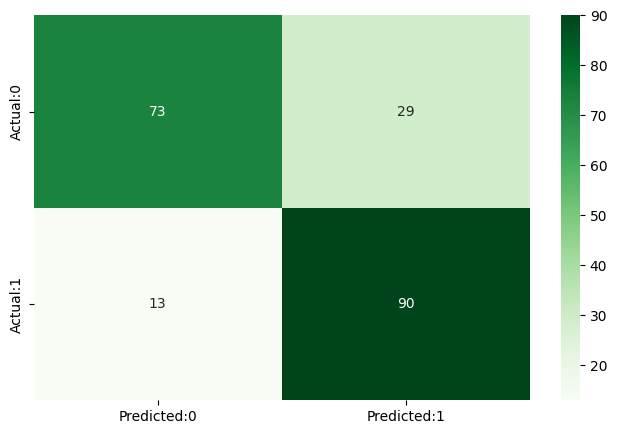

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [19]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [20]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

KNN Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

SVM Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighte

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for {name}:\n{cm}\n")


Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]



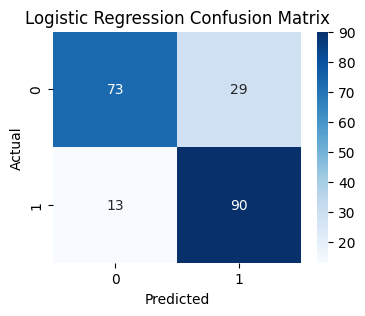

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
best_model = None
best_score = 0
best_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    
    if acc > best_score:
        best_model = model
        best_score = acc
        best_name = name



print(f"\n✅ Best Model: {best_name} with Accuracy: {best_score:.2f}")


KNN Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

SVM Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighte

In [25]:
# Save model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

with open("heart_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Save the scaler as well
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)